In [12]:
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv("transactions.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client_ID              4999 non-null   int64  
 1   Attrition_Flag         4999 non-null   object 
 2   Customer_Age           4999 non-null   int64  
 3   Gender                 4999 non-null   object 
 4   Education_Level        4999 non-null   object 
 5   Marital_Status         4999 non-null   object 
 6   Income_Category        4999 non-null   object 
 7   Months_on_book         4999 non-null   int64  
 8   Credit_Limit           4999 non-null   float64
 9   Total_Trans_Amt        4999 non-null   int64  
 10  Avg_Utilization_Ratio  4999 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 429.7+ KB
None


In [10]:
# Remove dublicates

data = data.drop_duplicates()

In [13]:
# preview data
print(data.head())

   Client_ID     Attrition_Flag  ...  Total_Trans_Amt Avg_Utilization_Ratio
0  768805383  Existing Customer  ...             1144                 0.061
1  818770008  Existing Customer  ...             1291                 0.105
2  713982108  Existing Customer  ...             1887                 0.000
3  769911858  Existing Customer  ...             1171                 0.760
4  709106358  Existing Customer  ...              816                 0.000

[5 rows x 11 columns]


In [17]:
# statistic informations
print(data.mean(numeric_only = True))

print(data.max(numeric_only = True))

print(data.min(numeric_only = True))

print(data.count(numeric_only = True))


Client_ID                7.400992e+08
Customer_Age             4.626725e+01
Months_on_book           3.589178e+01
Credit_Limit             9.282431e+03
Total_Trans_Amt          2.604005e+03
Avg_Utilization_Ratio    2.667065e-01
dtype: float64
Client_ID                8.283431e+08
Customer_Age             7.300000e+01
Months_on_book           5.600000e+01
Credit_Limit             3.451600e+04
Total_Trans_Amt          5.668000e+03
Avg_Utilization_Ratio    9.990000e-01
dtype: float64
Client_ID                708083283.0
Customer_Age                    26.0
Months_on_book                  13.0
Credit_Limit                  1438.3
Total_Trans_Amt                510.0
Avg_Utilization_Ratio            0.0
dtype: float64
Client_ID                4999
Customer_Age             4999
Months_on_book           4999
Credit_Limit             4999
Total_Trans_Amt          4999
Avg_Utilization_Ratio    4999
dtype: int64


In [20]:
# Total transaction amount per gender category

gender_category = data.groupby("Gender")["Total_Trans_Amt"].sum()
print("Total transaction amount per gender category ", gender_category)

Total transaction amount per gender category  Gender
F    6032519
M    6984902
Name: Total_Trans_Amt, dtype: int64


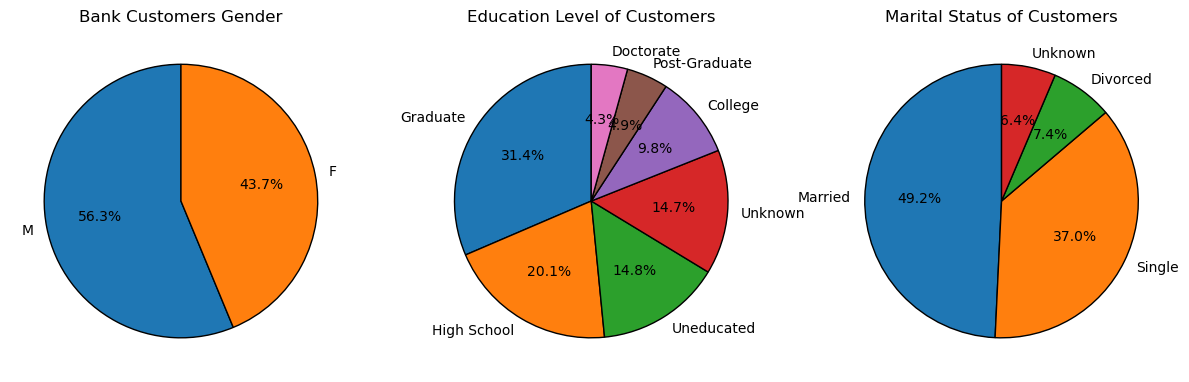

In [43]:
# Categorize
# Get counts and labels
gender_counts = data['Gender'].value_counts()
gender_labels = gender_counts.index

education_counts = data["Education_Level"].value_counts()
education_labels = education_counts.index

marital_counts = data["Marital_Status"].value_counts()
marital_labels = marital_counts.index

# Create subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart 1: Gender
axes[0].pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
axes[0].set_title("Bank Customers Gender")

# Pie chart 2: Education Level of Customers
axes[1].pie(education_counts, labels=education_labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
axes[1].set_title("Education Level of Customers")

# Pie chart 3: Marital status of Customers
axes[2].pie(marital_counts, labels= marital_labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
axes[2].set_title("Marital Status of Customers")


plt.show()



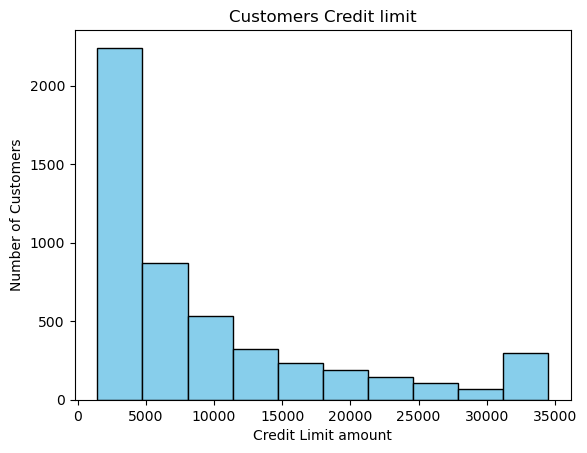

In [53]:
# Credit limits according to Income category
plt.hist(data["Credit_Limit"], bins = 10, color = "skyblue", edgecolor = "black")
plt.title("Customers Credit limit")
plt.xlabel("Credit Limit amount")
plt.ylabel("Number of Customers")
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

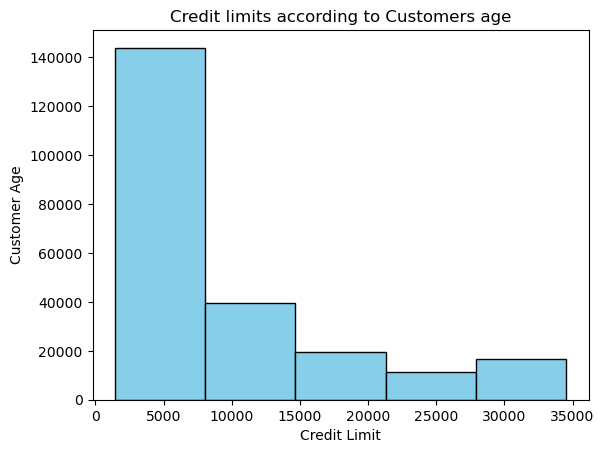

In [54]:
# Credit limits according to Customers age

plt.hist (data["Credit_Limit"],   
    bins=5,              
    weights=data["Customer_Age"],   
    color='skyblue',
    edgecolor='black'
)

plt.title("Credit limits according to Customers age")
plt.xlabel("Credit Limit")
plt.ylabel("Customer Age")
plt.show

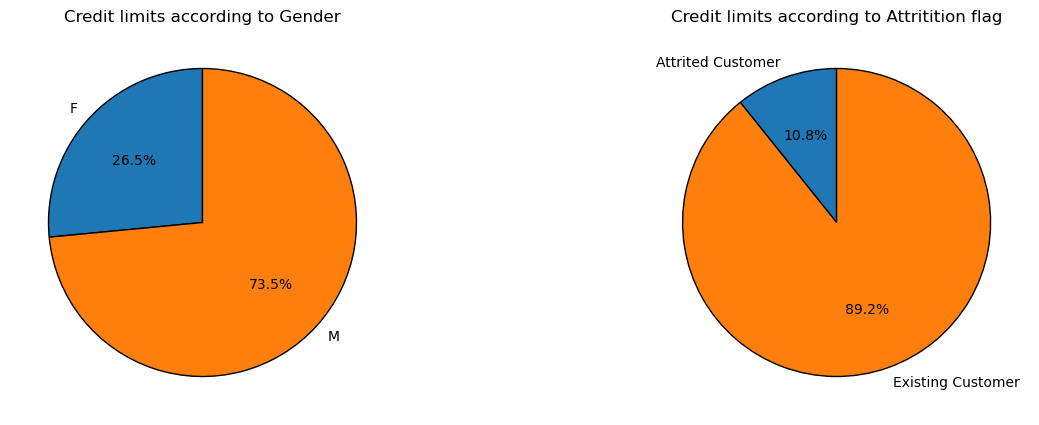

In [47]:


# Create subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Credit limits according to Gender 
credit_sum= data.groupby("Gender")["Credit_Limit"].sum()

axes[0].pie(credit_sum, labels = credit_sum.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'} )
axes[0].set_title("Credit limits according to Gender")

# Credit limits according to Attritition flag
credit_limits= data.groupby("Attrition_Flag")["Credit_Limit"].sum()

axes[1].pie(credit_limits, labels = credit_limits.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
axes[1].set_title("Credit limits according to Attritition flag")

plt.show()